In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.38507822,  0.1371957 ,  0.51140517, -0.79989278, -0.78236162,
         0.10842325, -0.61510582,  0.90819478, -0.96657741, -0.47868475],
       [-0.55929088, -0.67663548, -0.34727411,  0.62345584,  0.27457645,
         0.47223171,  0.08844046, -0.67534447, -0.08675679, -0.96303088]])

In [4]:
test_Features[:2]

array([[-0.95082145, -0.60499967, -1.36401979,  1.99976066,  2.08892648,
         0.31462716, -0.34162476, -0.46582688,  1.08182831, -0.39017926],
       [-0.10907332, -0.35962168,  0.4616788 , -0.26217114, -0.25841715,
         0.6799203 ,  0.77612949, -0.21895855,  1.66766666, -0.70959658]])

In [5]:
train_Label[:4]

array([1, 0, 0, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=20*9,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=20*8,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=20*7,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=20*6,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Conv1D(filters=20*5,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [19]:
model.add(MaxPooling1D(pool_size=1))

In [20]:
model.add(Conv1D(filters=20*4,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [21]:
model.add(MaxPooling1D(pool_size=1))

In [22]:
model.add(Conv1D(filters=20*3,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [23]:
model.add(MaxPooling1D(pool_size=1))

In [24]:
model.add(Conv1D(filters=20*2,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [25]:
model.add(MaxPooling1D(pool_size=1))

In [26]:
model.add(Conv1D(filters=20,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [27]:
model.add(MaxPooling1D(pool_size=1))

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(10, activation='tanh'))

In [30]:
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 180)           360       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 180)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 160)           28960     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 160)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 140)           22540     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 140)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 120)           16920     
__________

In [32]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [33]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 13s 1ms/step - loss: 0.5464 - acc: 0.7343 - val_loss: 0.3890 - val_acc: 0.8395
Epoch 2/30
10194/10194 [==============================] - 7s 644us/step - loss: 0.3936 - acc: 0.8373 - val_loss: 0.3654 - val_acc: 0.8501
Epoch 3/30
10194/10194 [==============================] - 7s 654us/step - loss: 0.3655 - acc: 0.8481 - val_loss: 0.3511 - val_acc: 0.8548
Epoch 4/30
10194/10194 [==============================] - 7s 704us/step - loss: 0.3524 - acc: 0.8569 - val_loss: 0.3443 - val_acc: 0.8580
Epoch 5/30
10194/10194 [==============================] - 6s 638us/step - loss: 0.3537 - acc: 0.8546 - val_loss: 0.3391 - val_acc: 0.8580
Epoch 6/30
10194/10194 [==============================] - 7s 666us/step - loss: 0.3392 - acc: 0.8592 - val_loss: 0.3450 - val_acc: 0.8548
Epoch 7/30
10194/10194 [==============================] - 12s 1ms/step - loss: 0.3415 - acc: 0.8592 - val_loss: 0.3348 - val

In [34]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

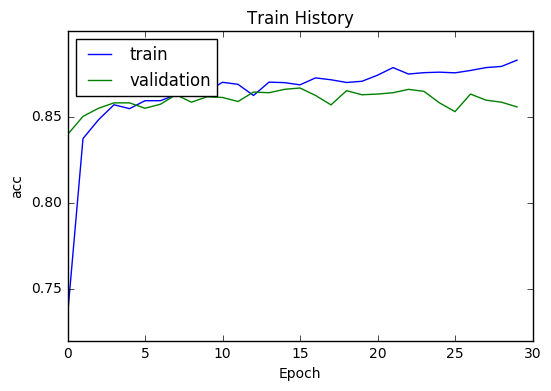

In [35]:
show_train_history(train_history,'acc','val_acc')

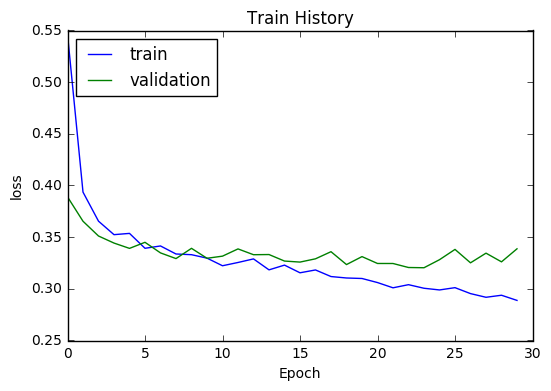

In [36]:
show_train_history(train_history,'loss','val_loss')

In [37]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 2s 345us/step


In [38]:
scores[1]

0.8628325633359255